## Distance transform for cell overlap

**Import necessary packages**

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import color, io
from PIL import Image
import pylab

**Utility function for displaying an image**

In [18]:
def show_image(img):
  pylab.imshow(img)
  pylab.show()

**Load image and convert from RGB to Grayscale**

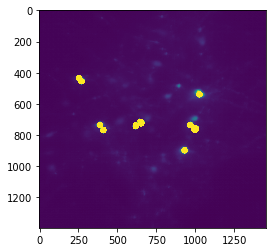

In [19]:
img = cv2.imread('input.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
show_image(gray)

**Apply binary threshold and OTSU's threshold**

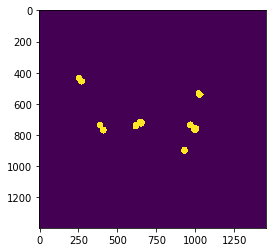

In [20]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show_image(thresh)

**Create 3x3 kernel and morphological opening to remove white noise**

In [21]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

**Morphological opening is used to create sure background area**

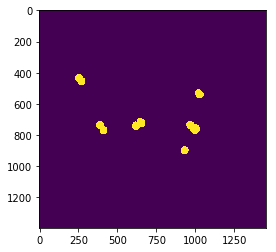

In [22]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
show_image(sure_bg) #dark (purple) spots in the output corresponds to sure background regions

**Similarly distance transform is performed to know the sure foreground**

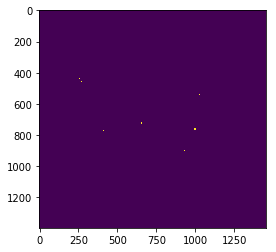

In [26]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
show_image(sure_fg) #tiny spots in the output corresponds to sure foreground regions

**Now that we know the sure foreground, which has separated the cell overlap, apply the blob detection algorithm**

Initailize blob detector params

In [27]:
params = params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 200
params.maxThreshold = 256

params.filterByCircularity = False
params.filterByInertia = False
params.filterByConvexity = False

Create the detector and represent the keypoints in a new image

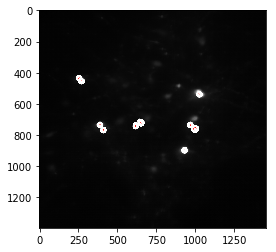

In [29]:
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(255-sure_fg)
im_with_keypoints = cv2.drawKeypoints(gray, keypoints, np.array([]), (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
show_image(im_with_keypoints)